<a href="https://colab.research.google.com/github/leesy211/leesy211.github.io/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(Kaggle) Titanic 생존자 예측하기

In [ ]:
#데이터셋 불러오기
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [ ]:
train, test = load_titanic_data()

In [ ]:
#훈련셋 헤드로 데이터 확인하기
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#데이터 값의 분포를 확인하기 위한 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
#범주형 특성 분포를 확인하기 위한 파이차트 만드는 함수 정의

def pie_chart(feature):
  feature_ratio = train[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = train[train['Survived'] == 1][feature].value_counts()
  dead = train[train['Survived'] == 0][feature].value_counts()
  
  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.title(feature + '\'s ratio in total')
  plt.show()

  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
    plt.title(str(index) + '\'s ratio')
    
    plt.show()

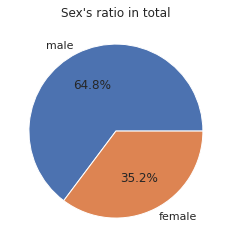

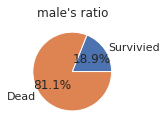

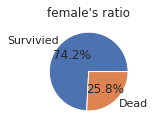

In [ ]:
#성별 비율
pie_chart('Sex')

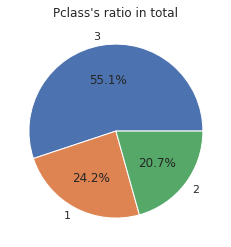

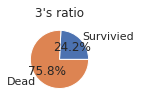

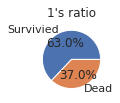

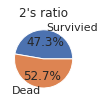

In [ ]:
#승객 클래스 비율
pie_chart('Pclass')

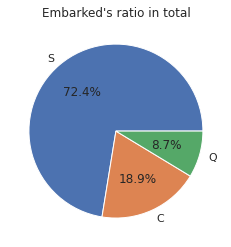

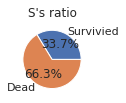

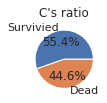

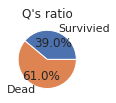

In [ ]:
# 승선지 비율
pie_chart('Embarked')

In [ ]:
# 특성별 생존자와 비생존자 비교를 위한 바차트 만드는 함수
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

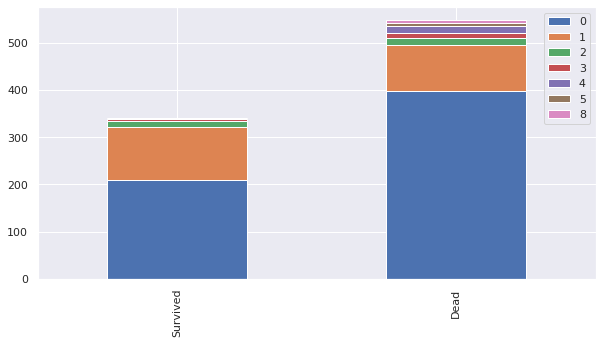

In [ ]:
bar_chart("SibSp")

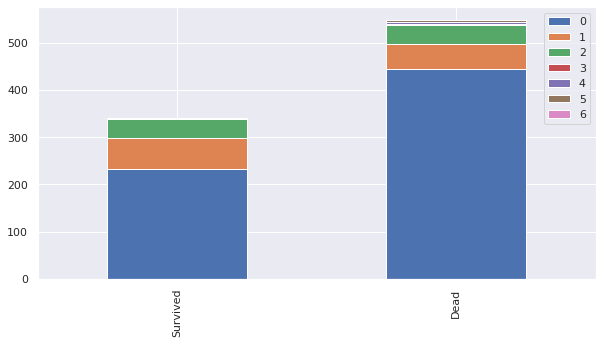

In [ ]:
bar_chart("Parch")

### 데이터 전처리 및 특성 추출

In [ ]:
#훈련셋와 테스트셋 모두에 대해 전처리하기 위해 데이터 합치기
train_and_test = [train, test]

In [ ]:
#이름 특성에서 새로운 title 특성 만들기
for dataset in train_and_test:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
#타이틀을 가진 사람이 몇명인지 성별과 함께 출력

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#흔하지 않은 title은 Other로 대체
#중복되는 표현은 동일한 값으로 대체
for dataset in train_and_test:
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                               'Lady','Major', 'Rev', 'Sir'], 'Other')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [ ]:
# 학습을 위해 String Data로 변형
for dataset in train_and_test:
  dataset['Title'] = dataset['Title'].astype(str)

In [ ]:
#성별 특성을 String Data로 변형
for dataset in train_and_test:
  dataset['Sex'] = dataset['Sex'].astype(str)

In [ ]:
#승선지 데이터에 결측치가 있는지 확인
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
#결측치를 가장 많은 비율을 가진 S 값으로 채우고
#String Data로 변형
for dataset in train_and_test:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')
  dataset['Embarked'] = dataset['Embarked'].astype(str)

In [ ]:
#나이 특성의 결측치는 나머지 모든 승객의 평균으로 대체
#수치형 데이터를 범주형 데이터로 변환
#같은 길이의 구간을 가지는 5개의 그룹 만들기
for dataset in train_and_test:
  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
  dataset['Age'] = dataset['Age'].astype(int)
  train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [ ]:
#나이 속성을 위에서 만든 5개의 그룹에 속하도록 바꾸기
for dataset in train_and_test:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
  dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [ ]:
#각 Pclass별 Fare과 어느 Pclass에 Fare의 결측지가 있는지 확인
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [ ]:
#결측치가 있는 Fare를 같은 Pclass 사람들의 평균 Fare로 채우기
for dataset in train_and_test:
  dataset['Fare'] = dataset['Fare'].fillna(13.675) # The only one empty fare data's pclass is 3.

In [ ]:
#수치형 데이터를 범주형 데이터로 변환
for dataset in train_and_test:
  dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
  dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
  dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
  dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Parch 와 SibSp 데이터를 합쳐서 Family 라는 새로운 특성 만들기
for dataset in train_and_test:
  dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
  dataset['Family'] = dataset['Family'].astype(int)

In [ ]:
#학습에서 제외시킬 특성들 제외시키기
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [ ]:
#범주형 특성에 대해 one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

#train data와 label을 분리
train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

In [ ]:
#사용할 예측 모델 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [ ]:
#학습전 데이터 섞어주기
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [ ]:
#fit()과 predict()를 바로 적용할 함수 만들기
def train_and_test(model):
  model.fit(train_data, train_label)
  prediction = model.predict(test_data)
  accuracy = round(model.score(train_data, train_label) * 100, 2)
  print("Accuracy : ", accuracy, "%")
  return prediction

In [ ]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  82.72 %
Accuracy :  83.5 %
Accuracy :  84.51 %
Accuracy :  88.55 %
Accuracy :  79.8 %


In [ ]:
#가장 정확도가 높은 랜덤포레스트 모델에 대한 결과파일 생성
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred})

submission.to_csv('submission_rf.csv', index=False)